# Контрольная работа №1
---
#### Выполнил: студент ПИ19-3 Ковалев А.И.

---
# Тема БД: Часть Базы Данных киберспортивного форума
---

### Бизнес-правила

- Пройдя регистрацию на форуме, можно стать пользователем форума

- Пользователю присваивается одна из ролей (Например: администратор, модератор, писатель, обычный пользователь)

- Писатели могут создавать статьи на форуме

- Обычные пользователи могут оставлять комментарии

### Логическая модель БД

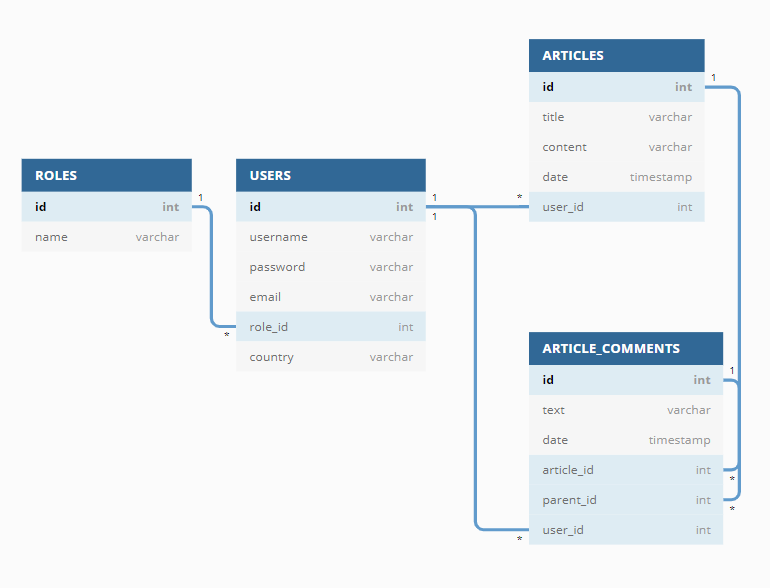

## Реализация на Python

### Вспомогательный код

In [3]:
class SingletonMeta(type):
    _instances = {}

    def __call__(cls, *args, **kwargs):
        if cls not in cls._instances:
            instance = super().__call__(*args, **kwargs)
            cls._instances[cls] = instance
        return cls._instances[cls]


### Код моделей базы данных

In [9]:
from sqlalchemy.ext.declarative import as_declarative, declared_attr
from sqlalchemy import Column, Integer, String, DateTime, ForeignKey, Text

CASCADE = "CASCADE"  # может где-то есть эти константы


@as_declarative()
class Base(object):

    @declared_attr
    def __tablename__(cls):
        return cls.__name__.lower() + "s"
    id = Column(Integer, primary_key=True, autoincrement=True)


class Article(Base):
    """Статья на форуме"""
    title = Column(String(200), nullable=False, index=True)
    content = Column(Text(15000), nullable=False)
    date = Column(DateTime)
    user_id = Column(Integer, ForeignKey("users.id", ondelete=CASCADE))

    def __repr__(self):
        return f'<{self.__class__.__name__} (' \
               f'title={self.title}, ' \
               f'content={self.content}, ' \
               f'date={self.date}' \
               f')>'

    __str__ = __repr__


class ArticleComment(Base):
    """Комментарий к статье"""
    text = Column(Text(2000), nullable=False)
    date = Column(DateTime)
    article_id = Column(Integer, ForeignKey("articles.id", ondelete=CASCADE))
    parent_id = Column(Integer, ForeignKey("articlecomments.id", ondelete=CASCADE))
    user_id = Column(Integer, ForeignKey("users.id", ondelete=CASCADE))

    def __repr__(self):
        return f'<{self.__class__.__name__} (' \
               f'text={self.text}, ' \
               f'date={self.date}' \
               f')>'

    __str__ = __repr__


class User(Base):
    """Пользователь форума"""
    username = Column(String(200), nullable=False)
    password = Column(String(200), nullable=False)
    email = Column(String(200), nullable=False)
    role_id = Column(Integer, ForeignKey("roles.id", ondelete=CASCADE))
    country = Column(String(200), nullable=False)

    def __repr__(self):
        return f'<{self.__class__.__name__} (' \
               f'username={self.username}, ' \
               f'password={self.password}, ' \
               f'email={self.email}, ' \
               f'country={self.country}, ' \
               f'role_id={self.role_id}' \
               f')>'

    __str__ = __repr__


class Role(Base):
    """Роль пользователя"""
    name = Column(String(60), nullable=False, unique=True)

    def __repr__(self):
        return f'<{self.__class__.__name__} (' \
               f'name={self.name}' \
               f')>'

    __str__ = __repr__


# if __name__ == '__main__':
#     from database import DataBase
#     db = DataBase()
    # Base.metadata.create_all(db.engine)
    # Base.metadata.drop_all(db.engine)


### Клас для управления БД

In [10]:
from sqlalchemy import create_engine
from sqlalchemy.orm.session import sessionmaker
# from models import Base, Role, User
# from utils import SingletonMeta
import pprint

DATABASE = "sqlite"
DB_NAME = "forum.db"


class DataBase(metaclass=SingletonMeta):

    def __init__(self):
        self.engine = create_engine(f"{DATABASE}:///{DB_NAME}")
        self.session = sessionmaker(bind=self.engine)()

    def _create_all_tables(self):
        Base.metadata.create_all(self.engine)

    def _remove_all_tables(self):
        Base.metadata.drop_all(self.engine)

    def init_base_roles(self):
        super_user = Role(name="super")
        creator = Role(name="creator")
        default = Role(name="default")
        self.session.add(super_user)
        self.session.add(creator)
        self.session.add(default)
        self.session.commit()

    def create_user(self, username: str, password: str, email: str, country: str):
        user = User(username=username, password=password, email=email, country=country)
        self.session.add(user)
        self.session.commit()

    def show_all_users(self):
        users = self.session.query(User).all()
        pprint.pprint(users)

    def show_all_roles(self):
        roles = self.session.query(Role).all()
        pprint.pprint(roles)


### Демонстрация (main.py)

In [11]:
# from database import DataBase


db = DataBase()
# db.init_base_roles()  # создали несколько базовых ролей
# db.create_user("alex", "123", "alex@gmail.com", "Russia")
# db.create_user("tom", "qwe", "tom_qwe@gmail.com", "USA")
# db.create_user("admin", "123", "admin@gmail.com", "Russia", role_id=1)
# db.create_user("sergey", "qwe", "ssssss@gmail.com", "Canada", role_id=2)
print("Пользователи:\n")
db.show_all_users()
print("\nСписок доступных ролей:\n")
db.show_all_roles()


Пользователи:

[<User (username=alex, password=123, email=alex@gmail.com, country=Russia, role_id=None)>,
 <User (username=tom, password=qwe, email=tom_qwe@gmail.com, country=USA, role_id=None)>,
 <User (username=admin, password=123, email=admin@gmail.com, country=Russia, role_id=1)>,
 <User (username=sergey, password=qwe, email=ssssss@gmail.com, country=Canada, role_id=2)>]

Список доступных ролей:

[<Role (name=super)>, <Role (name=creator)>, <Role (name=default)>]
